# Iris DataSet
En este problema se dará solución al problema de clasificación multiclase al dataset Iris mediante la apliación de 3 técnicas de clasificación:

- Logistic Regression One vs. All, 
- Logistic Regression One vs. One y 
- Softmax Regression

Primeramente, se realiza la importación de todas las librerías necesarias, incluyendo la clase datasets de la ñibrería *sklearn*, de donde se tomará el dataset

In [282]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

Seguidamente, examinaremos un poco el dataset con el que trabajaremos, detallando los parámetros que tiene, las etiquetas que maneja con el fin de conocer un poco sobre su constitución.

In [237]:
#Cargamos el dataset
iris = datasets.load_iris() 
#revisamos su forma
qty = np.shape(iris.target)
features = iris.feature_names
targets = iris.target_names

#Checamos la cantidad de datos que hay por clase
unique_targets, counts = np.unique(iris.target, return_counts=True)

print(f'Los parámetros son: {features}\n')
print(f'Las clases son: {targets}\n')
print(f'La cantidad de datos son: {qty[0]}\n')
print('La distribución que sigue es:')
[print(f'Clase {unique_targets[i]} : {counts[i]}') for i in range(np.shape(unique_targets)[0])]


Los parámetros son: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Las clases son: ['setosa' 'versicolor' 'virginica']

La cantidad de datos son: 150

La distribución que sigue es:
Clase 0 : 50
Clase 1 : 50
Clase 2 : 50


[None, None, None]

Podemos resumir lo que acabamos de hacer en las siguientes ideas:

- El dataset cuenta con 150 datos.
- Hay 3 clases diferentes: setosa, versicolor y virginica.
- Cada clase cuenta con 50 datos.
- Los parámetros que permiten clasificar un sujeto en una clase son: largo del sepal, ancho del sepal, largo del pétalo y ancho del pétalo; todos medidos en cm.

Lo que resta ahora es dividir el dataset en datos de entrenamiento y evaluación. Es importane mencionar las sigueintes dos consideraciones:
- Debido a reducido tamaño del dataset, los datos de validación y de evaluación serán los mismos **(REVISAR)**
- Para tener una buena precisión, la división de los datos debe de ser equitativa.

In [311]:
ts = 0.1 #Test size
#NOTA: COMO EL DATASET ES MUY PEQUEÑO, PUEDE QUE UN TAMAÑO DE 40% SEA BUENO PARA EL TESTSET
seed = 34 #semilla

train_iris, test_iris, train_target, test_target = train_test_split(iris.data, iris.target, test_size=ts, 
                                                                    random_state=seed, shuffle=True,
                                                                    stratify=iris.target)

#Verificando la división equitativa
#unique, count = np.unique(train_target, return_counts=True)
#print(f'{unique}, {count}')

De igual manera, resulta conveniente hacer una revisión gráfica de las variables que están involucradas en este problema, así como una matriz de correlación, para ello hacemos uso de algunas funciones de la librería *Seaborn*

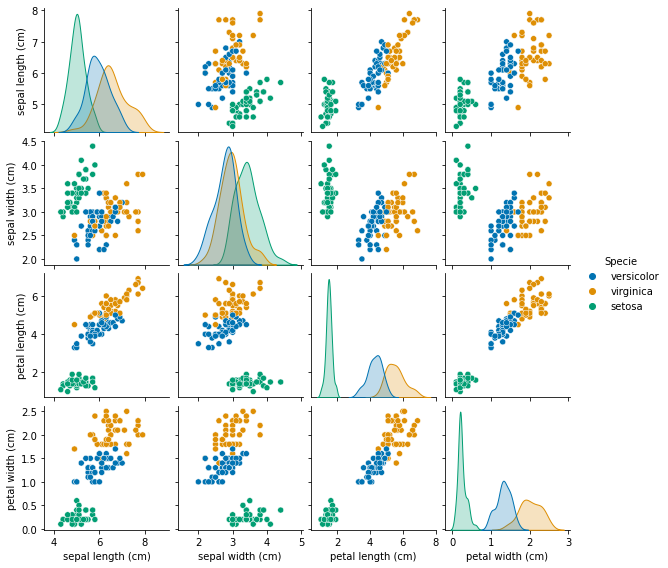

In [312]:
#Hacemos un rápido preprocesamiento
df = pd.DataFrame(data=train_iris, columns=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"])
df.insert(4, "Specie", train_target, True)

df["Specie"] = [(s, "setosa")[s==0] for s in df["Specie"]]
df["Specie"] = [(s, "versicolor")[s==1] for s in df["Specie"]]
df["Specie"] = [(s, "virginica")[s==2] for s in df["Specie"]]


sns.pairplot(df, hue="Specie", height=2, palette='colorblind')
plt.show()

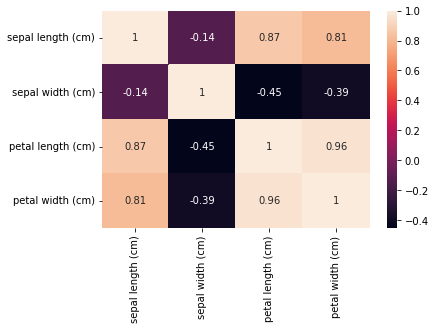

In [313]:
corrmat = df.corr()
sns.heatmap(corrmat, annot=True);
plt.show()

De las gráficas anteriores, se puede apreciar que hay una fuerte correlación entre el largo del sepal y las dimensiones del pétalo (largo y ancho), así como el ancho y el largo del pétalo. Por el otro lado, no hay una buena correlación del ancho del sepal con las demás variables.


Una vez terminado el análisis de los datos, seguimos con la resolución del problema de regresión lógistica con los métodos propuestos

In [314]:
def sigmoid(theta, X):
    z = np.dot(theta, X)
    return 1 / (1 + np.exp(-z))

def cost_function(hypo, X, y):
    m = len(y)
    return (-1/m)*(y*np.log(hypo) + (1-y)*np.log(1-hypo)).sum(axis=1)

def gradient(hypo, X, y):
    m = len(y)
    return 1/m * np.dot(hypo-y,X), 1/m * np.sum(hypo-y)

def datasets(new_datasets, targets_to_use, weights, params):

    i = 0

    for nds in new_datasets:
        
        weights[i] = np.random.randn((params), 1) #Rellenamos con números aleatorios (Bias considerado)
        
        for j in range(np.shape(targets_to_use)[0]):
            if targets_to_use[j] == i:
                nds.append(1)
            else:
                nds.append(0)
        i+=1
        
    return weights, new_datasets
                  

## Regresión logística: One vs All

La estrategia de One vs All se basa en el entrenamiento de una cantidad *N* de clasificadores binarios de regresión logística (función sigmoide). Por comodidad redefinimos las variables con nombres más cortos y debido a que vamos a trabajar con 3 clases, creamos las variables en los que se irán guardando los pesos y creamos 3 arreglos que seguirán la metodología de One vs All. así mismo, antes de poder trabajar directamente con los datos de entrenamiento, es necesario concatenar al arreglo **X** una columna de *1's*, correspondientes al bias.

In [327]:
ds_class0 = []
ds_class1 = []
ds_class2 = []


X = np.array([np.concatenate([train_iris[i], [1]], axis=0) for  i in range(len(train_iris))])
#X = train_iris
y = train_target

#4 datos correspodientes a las variables del problema y un bias
params = len(X[0])

theta = np.array([np.zeros(params).reshape(-1, 1),
                  np.zeros(params).reshape(-1, 1),
                  np.zeros(params).reshape(-1, 1)])

new_datasets = [ds_class0, ds_class1, ds_class2]

theta, new_datasets = datasets(new_datasets, y, theta, params)

print('Pesos aleatorios:\n')
print(theta)   

print('\n\nTargets originales:\n')
print(y)

print('\n \nTargets para la clase 0:\n')
print(new_datasets[0])

print('\n \nTargets para la clase 1:\n')
print(new_datasets[1])

print('\n \nTargets para la clase 2:\n')
print(new_datasets[2])


Pesos aleatorios:

[[[-0.51728618]
  [ 1.66232432]
  [-1.05285785]
  [ 0.42144288]
  [-0.93902702]]

 [[-0.81640636]
  [-0.2113603 ]
  [ 1.20578182]
  [-0.77476263]
  [-0.92100722]]

 [[ 0.70025393]
  [ 1.16159466]
  [-2.03975066]
  [-0.46871216]
  [ 1.71590686]]]


Targets originales:

[1 2 1 0 0 2 2 2 2 0 0 1 0 2 0 2 0 1 1 2 2 0 2 2 0 2 2 1 0 1 1 1 0 1 1 1 2
 0 0 2 0 0 1 0 2 2 2 2 2 1 2 0 1 2 0 1 0 2 1 2 1 0 0 0 1 0 1 1 1 2 0 1 1 2
 2 2 1 0 0 1 2 1 0 0 2 2 2 0 0 1 2 2 0 0 1 2 1 1 1 2 1 0 1 0 0 2 1 2 0 2 0
 0 1 1 1 1 2 2 2 0 0 1 0 1 0 1 1 2 0 2 1 2 0 0 1]

 
Targets para la clase 0:

[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0]

 

Una vez preparados los diferentes targets para este método, creado los pesos aleatorios iniciales y agregado el bias a los parámetros de entrenamiento, procedemos a entrenar nuestro algoritmo utilizando el descenso del gradiente

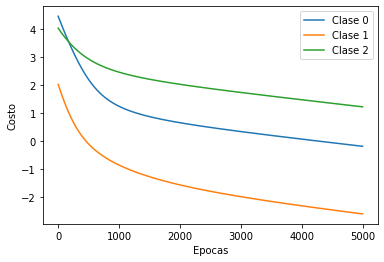

In [328]:
epochs = 5000
lr = 0.0001
clases = 3

#Creamos un arreglo en el que iremos guardando nuestro error
J = np.array([np.zeros(epochs),
              np.zeros(epochs),
              np.zeros(epochs)])


for c in range(clases):
    for e in range(epochs):
        hypothesis = sigmoid(theta[c].T, X.T)
        J[c][e] = cost_function(hypothesis, X, y)
        dW, _ = gradient(hypothesis, X, y)
        theta[c] = theta[c] - lr*dW.T
        
plt.plot(J[0])
plt.plot(J[1])
plt.plot(J[2])

plt.ylabel("Costo")
plt.xlabel("Epocas")

plt.legend(['Clase 0', 'Clase 1', 'Clase 2'])

plt.show()

In [322]:
print(f"Los pesos encontrados son: {theta}")

Los pesos encontrados son: [[[ 2.40197908]
  [-0.40248796]
  [-0.39916388]
  [-0.31296728]]

 [[ 0.88185322]
  [ 1.42524311]
  [-0.76234137]
  [ 0.5829705 ]]

 [[ 0.07697882]
  [-0.40032704]
  [ 1.12326522]
  [-0.56576217]]]


In [323]:

X_test = np.array([np.concatenate([test_iris[i], [1]], axis=0) for  i in range(len(test_iris))])
#X_test = test_iris
y_test_clases = np.array([np.zeros(len(test_target)), 
                          np.zeros(len(test_target)), 
                          np.zeros(len(test_target))])  

for i in range(3):
    y_test_clases[i] = sigmoid(theta[i].T, X_test.T)

Prob = np.c_[y_test_clases[0:1].T , y_test_clases[1:2].T , y_test_clases[2:3].T ]    
Y_predict = np.argmax(Prob, axis=-1)    

#print(Prob)
print(np.c_[Y_predict, test_target])

[[0 2]
 [0 2]
 [0 1]
 [0 0]
 [0 0]
 [0 2]
 [0 2]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 2]]


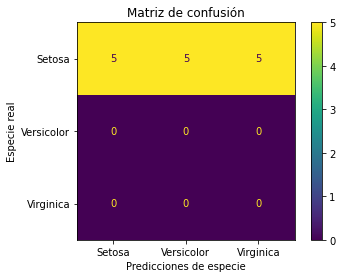

In [324]:
matrix = confusion_matrix(Y_predict, test_target)

matrix_obj = ConfusionMatrixDisplay(matrix, display_labels=['Setosa', 'Versicolor', 'Virginica'])
matrix_obj.plot()
matrix_obj.ax_.set(title='Matriz de confusión', xlabel='Predicciones de especie', ylabel='Especie real')

plt.show()

## Regresión logística One vs One
Este tipo de metodología realiza una clasificación binaria entre cada uno de las combinaciones que existe, iremos haciendo una comparación entre cada clase, las comparaciones son:
- clase 0 vs clase 1
- clase 0 vs clase 2
- clase 1 vs clase 2

5


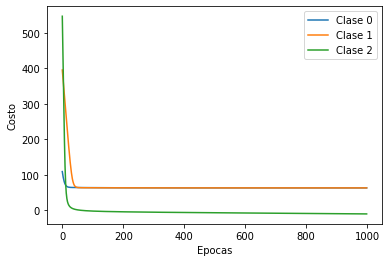

In [416]:
#Preparamos los datos
X2 = train_iris
y2 = np.c_[train_target]

X3 = test_iris
y3 = np.c_[test_target]

data_train = np.concatenate([X2, y2], axis=1)
data_test = np.concatenate([X3, y3], axis=1)

#print(data_train)
#print(data_test)

#Hacemos un filtrado de los datos por clase
#PARA DATOS DE ENTRENAMIENTO
flag0 = 0
flag1 = 0
flag2 = 0
X_clase0 = [0, 0, 0, 0, 0]
X_clase1 = [0, 0, 0, 0, 0]
X_clase2 = [0, 0, 0, 0, 0]
Y_clase0 = [0, 0, 0, 0, 0]
Y_clase1 = [0, 0, 0, 0, 0]
Y_clase2 = [0, 0, 0, 0, 0]

for dt in data_train:
    #Etiqueta 0
    if dt[4] == 0:
        if flag0 == 0:
            X_clase0 = dt[[0, 1, 2, 3]]
            Y_clase0 = dt[[4]]
            flag0 = 1
        else:
            X_clase0 = np.vstack([X_clase0, dt[[0, 1, 2, 3]]])
            Y_clase0 = np.vstack([Y_clase0, dt[[4]]])
    
    #Etiqueta 1
    if dt[4] == 1:
        if flag1 == 0:
            X_clase1 = dt[[0, 1, 2, 3]]
            Y_clase1 = dt[[4]]
            flag1 = 1
        else:
            X_clase1 = np.vstack([X_clase1, dt[[0, 1, 2, 3]]])
            Y_clase1 = np.vstack([Y_clase1, dt[[4]]])
            
    #Etiqueta 2
    if dt[4] == 2:
        if flag2 == 0:
            X_clase2 = dt[[0, 1, 2, 3]]
            Y_clase2 = dt[[4]]
            flag2 = 1
        else:
            X_clase2 = np.vstack([X_clase1, dt[[0, 1, 2, 3]]])
            Y_clase2 = np.vstack([Y_clase1, dt[[4]]])



#PARA DATOS DE EVALUACIÓN


#Creamos las combinaciones que se evaluarán
X01 = np.append(X_clase0, X_clase1, axis=0)
Y01 = np.append(Y_clase0, Y_clase1, axis=0)
X02 = np.append(X_clase0, X_clase2, axis=0)
Y02 = np.append(Y_clase0, Y_clase2, axis=0)
X12 = np.append(X_clase1, X_clase2, axis=0)
Y12 = np.append(Y_clase1, Y_clase2, axis=0)

#Agregando el Bias
X01 = np.array([np.concatenate([X01[i], [1]], axis=0) for i in range(len(X01))])
X02 = np.array([np.concatenate([X02[i], [1]], axis=0) for i in range(len(X02))])
X12 = np.array([np.concatenate([X12[i], [1]], axis=0) for i in range(len(X12))])

params2 = len(X01[0])
print(params2)

#Entrenamiento
#Pesos para cada uno de las combinaciones
theta2 = np.array([np.zeros(params2).reshape(-1, 1),
                   np.zeros(params2).reshape(-1, 1),
                   np.zeros(params2).reshape(-1, 1)])

for i in range(3):
    theta2[i] = np.random.randn((params2), 1) #Rellenamos con números aleatorios (Bias considerado)


Y_OvO = np.array([Y01,Y02,Y12])
 
epochs2 = 1000
lr2 = 0.0001
combinaciones = 3

#Creamos un arreglo en el que iremos guardando nuestro error
J2 = np.array([np.zeros(epochs2),
               np.zeros(epochs2),
               np.zeros(epochs2)])

X_OvO = np.array([X01, X02, X12])

for c in range(combinaciones):
    for e in range(epochs2):
        hypothesis2 = sigmoid(theta2[c].T, X_OvO[c].T)
        J2[c][e] = (cost_function(hypothesis2, X_OvO[c], Y_OvO[c])).sum(axis=0)
        dW2, _ = gradient(hypothesis2, X_OvO[c], Y_OvO[c])
        dW2 = dW2.sum(axis=0)
        dW2 = np.expand_dims(dW2, axis=1)
        theta2[c] = theta2[c] - lr2*dW2
        
plt.plot(J2[0])
plt.plot(J2[1])
plt.plot(J2[2])

plt.ylabel("Costo")
plt.xlabel("Epocas")

plt.legend(['Clase 0', 'Clase 1', 'Clase 2'])

plt.show()


In [ ]:



X_train = X.iloc[train_index]
X_test = X.iloc[test_index]
Y_train = np.c_[Y.iloc[train_index]]
Y_test = np.c_[Y.iloc[test_index]]

A = pd.concat([X.iloc[train_index], Y.iloc[train_index]] , axis = 1)
B = pd.concat([X.iloc[test_index], Y.iloc[test_index]] , axis = 1)

Xtrain_zero = A[A.iloc[:,4] == 0 ].iloc[:,[0,1,2,3]]      # X_train de Clase 0 
Xtrain_one = A[A.iloc[:,4] == 1 ].iloc[:,[0,1,2,3]]       # X_train de Clase 1 
Xtrain_two = A[A.iloc[:,4] == 2 ].iloc[:,[0,1,2,3]]       # X_train de Clase 2
Ytrain_zero = A[A.iloc[:,4] == 0 ].iloc[:,4]      # Y_train de Clase 0 
Ytrain_one = A[A.iloc[:,4] == 1 ].iloc[:,4]       # Y_train de Clase 1 
Ytrain_two = A[A.iloc[:,4] == 2 ].iloc[:,4]       # Y_train de Clase 2

Ytest_zero = B[B.iloc[:,4] == 0 ].iloc[:,4]      # Y_test de Clase 0 
Ytest_one = B[B.iloc[:,4] == 1 ].iloc[:,4]       # Y_test de Clase 1 
Ytest_two = B[B.iloc[:,4] == 2 ].iloc[:,4]       # Y_test de Clase 2

Xtrain01 = np.append(Xtrain_zero, Xtrain_one, axis=0)
Xtrain02 = np.append(Xtrain_zero, Xtrain_two, axis=0)
Xtrain12 = np.append(Xtrain_one, Xtrain_two, axis=0)
Ytrain01 = np.append(Ytrain_zero, Ytrain_one, axis=0)
Ytrain02 = np.append(Ytrain_zero, Ytrain_two, axis=0)
Ytrain12 = np.append(Ytrain_one, Ytrain_two, axis=0)

Ytest01 = np.append(Ytest_zero, Ytest_one, axis=0)
Ytest02 = np.append(Ytest_zero, Ytest_two, axis=0)
Ytest12 = np.append(Ytest_one, Ytest_two, axis=0)



# Entrenamiento
theta = np.array([np.zeros(5).reshape(-1,1), np.zeros(5).reshape(-1,1), np.zeros(5).reshape(-1,1)])

########################################################################################################3

for i in range(3):
    theta[i] = np.random.randn((X.shape[1] + 1), 1) 

########################################################################################################3

yc01 = (Ytrain01 == 0).astype(np.int32).reshape(-1,1)
yc02 = (Ytrain02 == 0).astype(np.int32).reshape(-1,1)
yc12 = (Ytrain12 == 1).astype(np.int32).reshape(-1,1)

ytest01 = (Ytest01 == 0).astype(np.int32).reshape(-1,1)
ytest02 = (Ytest02 == 0).astype(np.int32).reshape(-1,1)
ytest12 = (Ytest12 == 1).astype(np.int32).reshape(-1,1)

#b = (Y_train == 0)

Xtrain_zero = A[A.iloc[:,4] == 0 ].iloc[:,[0,1,2,3]]      # X_train de Clase 0 
Xtrain_one = A[A.iloc[:,4] == 1 ].iloc[:,[0,1,2,3]]       # X_train de Clase 1 
Xtrain_two = A[A.iloc[:,4] == 2 ].iloc[:,[0,1,2,3]]       # X_train de Clase 2

Xtrain01 = np.append(Xtrain_zero, Xtrain_one, axis=0)
Xtrain02 = np.append(Xtrain_zero, Xtrain_two, axis=0)
Xtrain12 = np.append(Xtrain_one, Xtrain_two, axis=0)

yc = np.array([yc01,yc02,yc12], dtype=object)
Y_c= np.array([ytest01,ytest02,ytest12], dtype=object)

#¿Volvió a a hacerlo mismo?
########################################################################################################3

#Xtrain = np.array([Xtrain01, Xtrain01, Xtrain12])

m = len(X_train)
m01 = len(Xtrain01)
m02 = len(Xtrain02)
m12 = len(Xtrain12)

X_b01 = np.c_[np.ones((m01, 1)), Xtrain01]              #Clase 0 vs 1
X_b02 = np.c_[np.ones((m02, 1)), Xtrain02]              #Clase 0 vs 2
X_b03 = np.c_[np.ones((m12, 1)), Xtrain12]              #Clase 1 vs 2

#Hasta aquí solo agregó el Bias
########################################################################################################



theta1 = theta[0]
y_train1 = yc[0]
J_log1 = np.zeros(epochs)
for i in range(epochs):
    J_log1[i] =(-1/m)*(y_train1*np.log(sigmoid(X_b01 @ theta1)) + (1-y_train1)*(np.log(1-sigmoid(X_b01 @ theta1)))).sum(axis=0)
    gradients = (1 / m) * (X_b01.T @ (sigmoid(X_b01 @ theta1) - y_train1))
    theta1 = theta1- eta * gradients                       
theta[0] = theta1

theta2 = theta[1]
y_train2 = yc[1]
J_log2 = np.zeros(epochs)
for j in range(epochs):
    J_log2[i] =(-1/m)*(y_train2*np.log(sigmoid(X_b02 @ theta2)) + (1-y_train2)*(np.log(1-sigmoid(X_b02 @ theta2)))).sum(axis=0)
    gradients = (1 / m) * (X_b02.T @ (sigmoid(X_b02 @ theta2) - y_train2))
    theta2 = theta2- eta * gradients                       
theta[1] = theta2

theta3 = theta[2]
y_train3 = yc[2]
J_log3 = np.zeros(epochs)
for j in range(epochs):
    J_log3[i] =(-1/m)*(y_train3*np.log(sigmoid(X_b03 @ theta3)) + (1-y_train3)*(np.log(1-sigmoid(X_b03 @ theta3)))).sum(axis=0)
    gradients = (1 / m) * (X_b03.T @ (sigmoid(X_b03 @ theta3) - y_train3))
    theta3 = theta3- eta * gradients                       
theta[2] = theta3

J_log = np.c_[J_log1 , J_log2 , J_log3]  






# Test

m = len(X_test)

X_b_test = np.c_[np.ones((m, 1)), X_test]

y_pr0 = np.zeros(len(test_index))
y_pr1 = np.zeros(len(test_index))
y_pr2 = np.zeros(len(test_index))

y_pr= np.array([y_pr0, y_pr1, y_pr2])  

for i in range(3):
    y_pr[i] = sigmoid(theta[i].T @ X_b_test.T)

Prob = np.c_[y_pr[0:1].T , y_pr[1:2].T , y_pr[2:3].T ]  
y_01_predict = y_pr[0:1].T.round(0)
y_02_predict = y_pr[1:2].T.round(0)
y_12_predict = y_pr[2:3].T.round(0)

Y_predict=np.zeros(len(test_index))
for i in range(len(test_index)):
    if (y_01_predict[i] == 1 and y_02_predict[i] == 1):
        Y_predict[i] = 0
    if (y_01_predict[i] == 0 and y_12_predict[i] == 1):
        Y_predict[i] = 1
    if (y_02_predict[i] == 0 and y_12_predict[i] == 0):
        Y_predict[i] = 2